In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_validate, train_test_split, cross_val_score)
from sklearn.metrics import make_scorer,recall_score
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

from time import time
plt.rc('font', family='NanumGothic')

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')
df_train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [5]:
df_train = df_train.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)

### 결측치 확인
null값이 많음

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMPONENT_ARBITRARY  14095 non-null  object 
 1   ANONYMOUS_1          14095 non-null  int64  
 2   YEAR                 14095 non-null  int64  
 3   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 4   ANONYMOUS_2          14095 non-null  int64  
 5   AG                   14095 non-null  int64  
 6   AL                   14095 non-null  int64  
 7   B                    14095 non-null  int64  
 8   BA                   14095 non-null  int64  
 9   BE                   14095 non-null  int64  
 10  CA                   14095 non-null  int64  
 11  CD                   12701 non-null  float64
 12  CO                   14095 non-null  int64  
 13  CR                   14095 non-null  int64  
 14  CU                   14095 non-null  int64  
 15  FH2O                 3890 non-null  

### Features Info
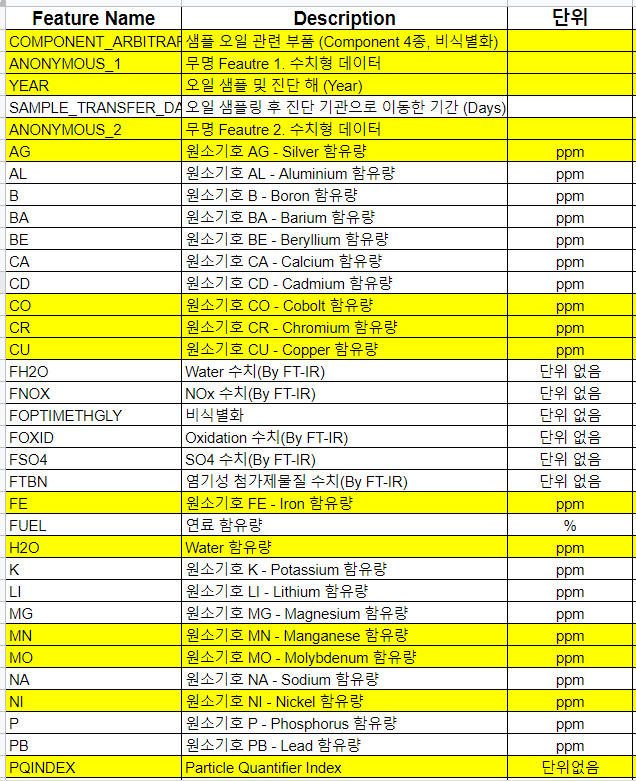
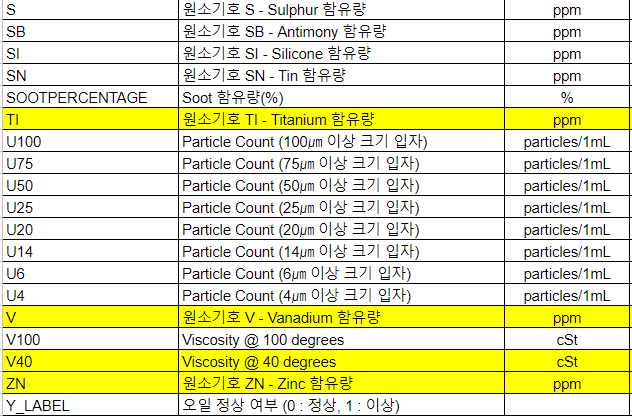

## EDA

In [12]:
cat_columns = ['ID','COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL']
num_columns = [i for i in df_train.columns if i not in cat_columns]
len(num_columns)

50

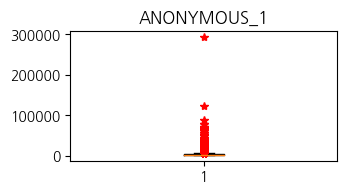

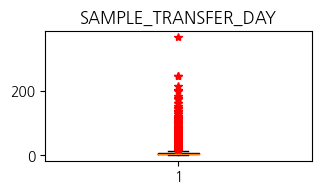

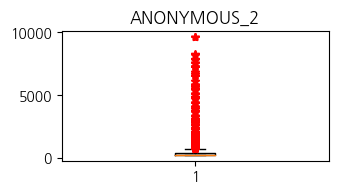

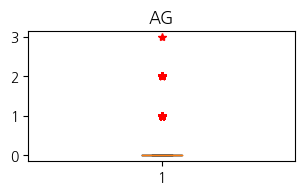

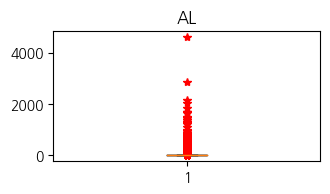

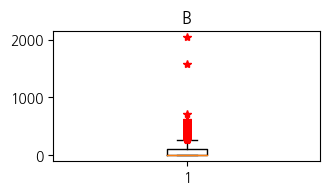

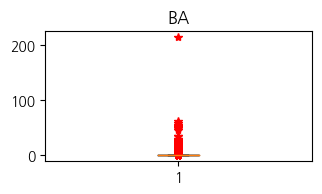

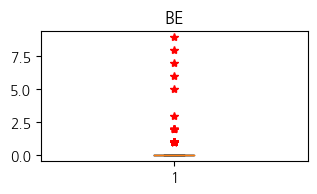

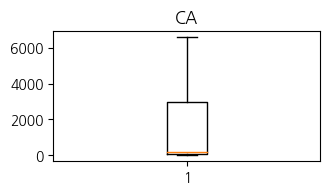

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


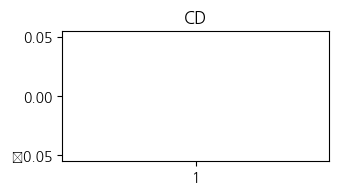

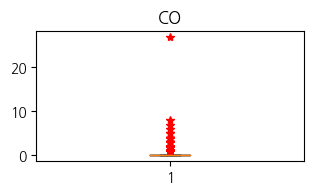

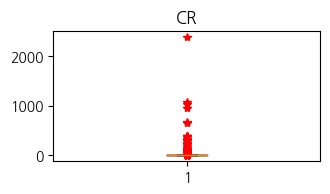

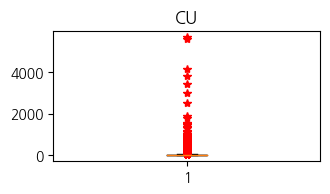

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


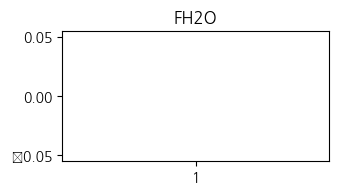

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


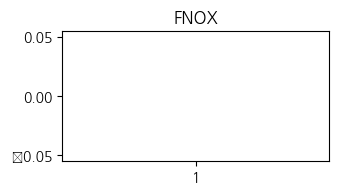

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


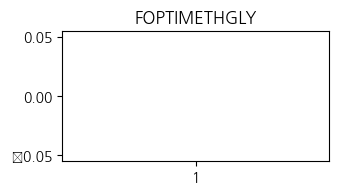

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


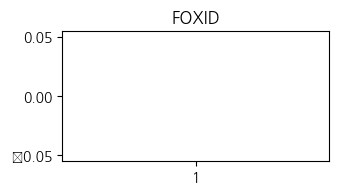

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


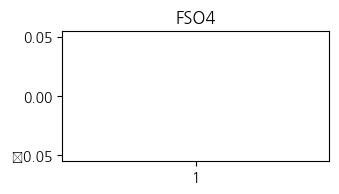

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


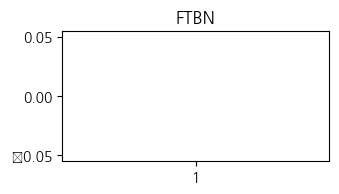

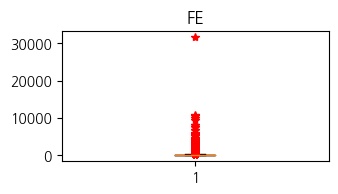

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


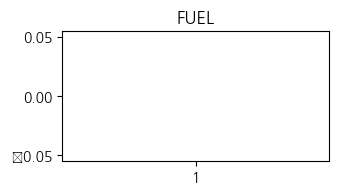

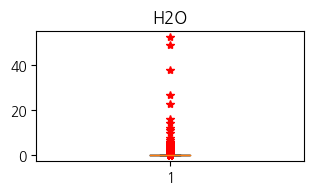

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


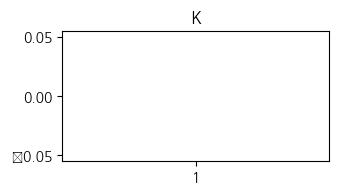

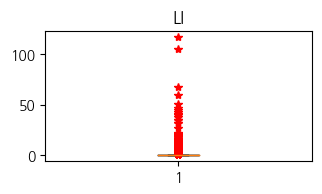

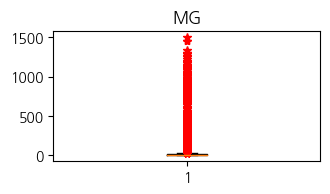

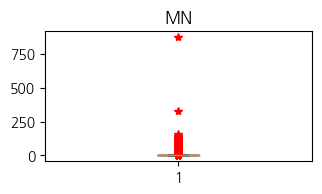

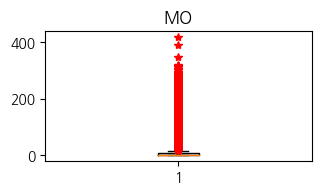

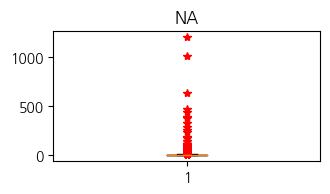

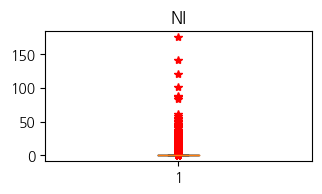

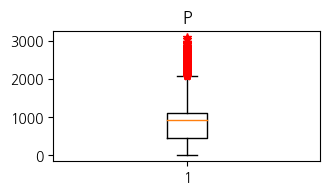

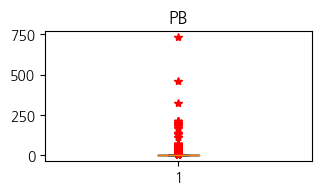

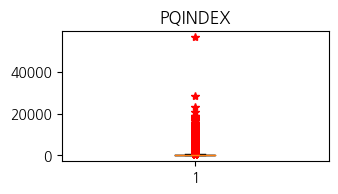

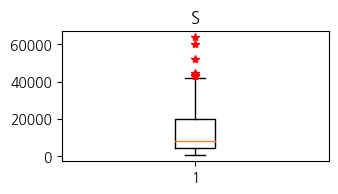

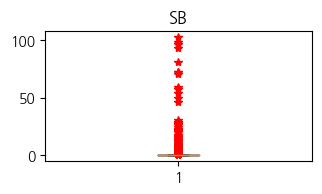

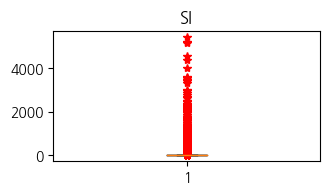

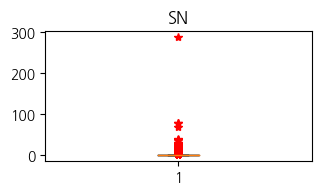

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


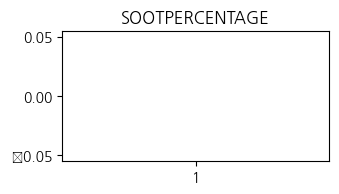

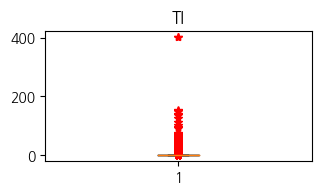

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


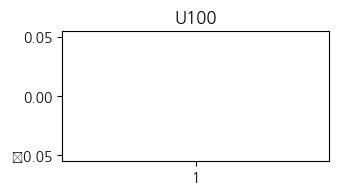

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


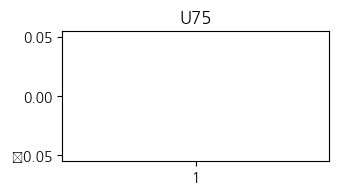

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


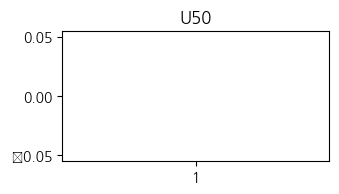

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


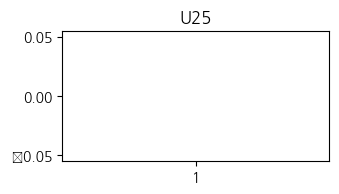

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


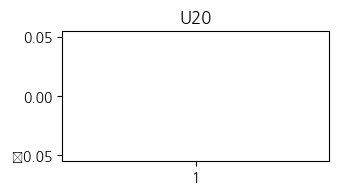

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


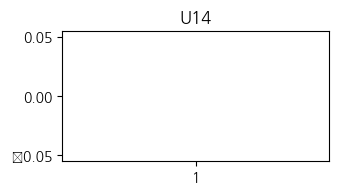

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


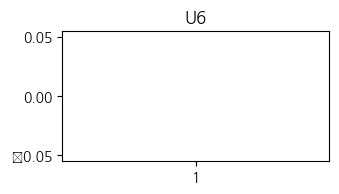

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


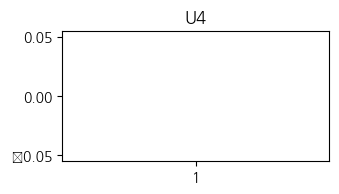

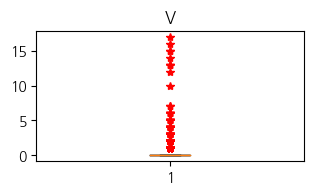

C:\Users\lynn1\anaconda3\envs\data-analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


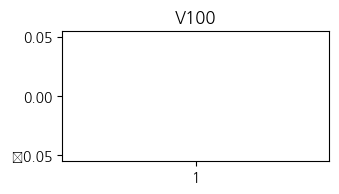

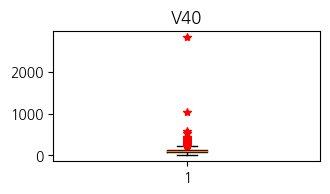

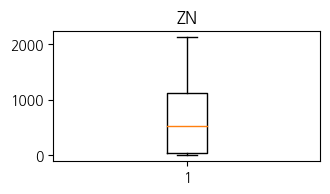

In [34]:
# plt.figure(figsize=(20,30))
for i, col in enumerate(num_columns):
    plt.figure(figsize=(20,20))
    plt.subplot(10,5,i+1)
    plt.boxplot(df_train[col], sym='r*')
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='COMPONENT_ARBITRARY', ylabel='count'>

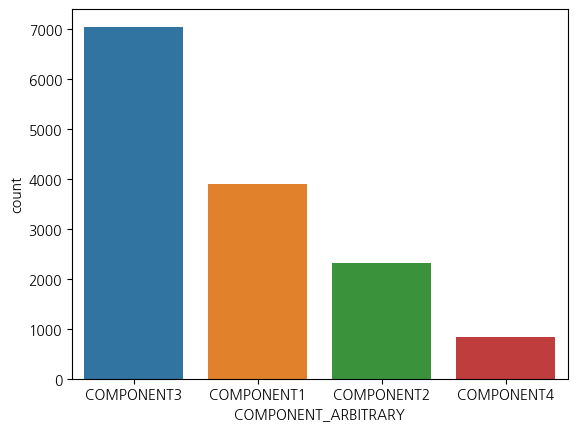

In [24]:
sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = df_train,
              order = df_train['COMPONENT_ARBITRARY'].value_counts().index)cccccccccccccc

<AxesSubplot:xlabel='YEAR', ylabel='count'>

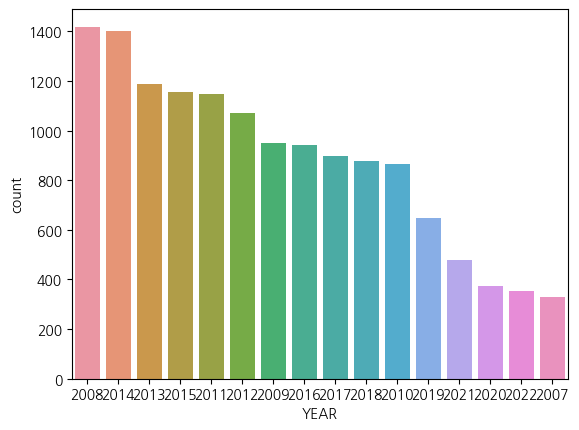

In [25]:
sns.countplot(x = 'YEAR',
              data = df_train,
              order = df_train['YEAR'].value_counts().index)

<AxesSubplot:xlabel='Y_LABEL', ylabel='count'>

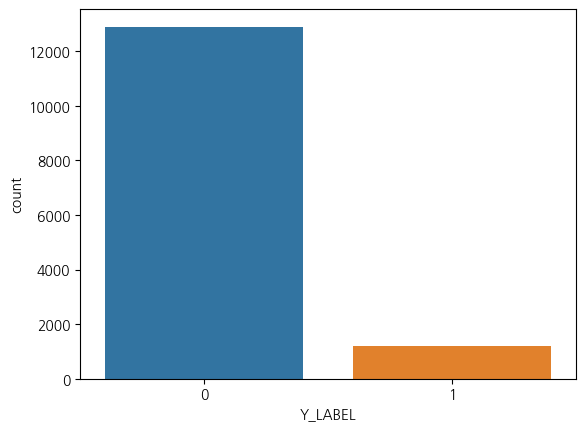

In [26]:
sns.countplot(x = 'Y_LABEL',
              data = df_train,
              order = df_train['Y_LABEL'].value_counts().index)

<AxesSubplot:xlabel='COMPONENT_ARBITRARY', ylabel='count'>

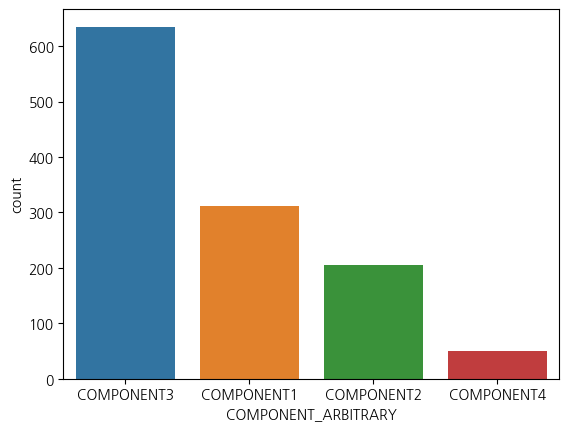

In [28]:
sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = df_train[df_train['Y_LABEL']==1],
              order = df_train['COMPONENT_ARBITRARY'].value_counts().index)

<AxesSubplot:xlabel='COMPONENT_ARBITRARY', ylabel='count'>

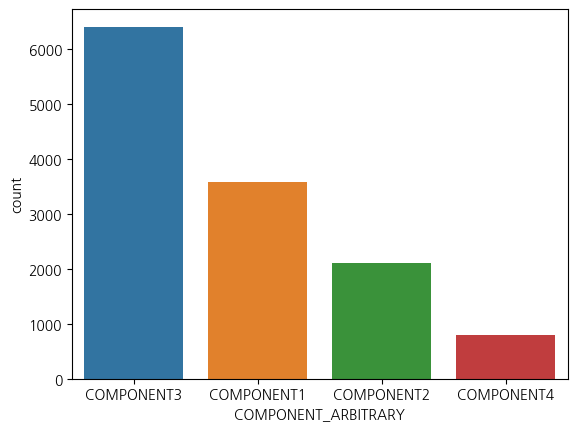

In [29]:
sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = df_train[df_train['Y_LABEL']==0],
              order = df_train['COMPONENT_ARBITRARY'].value_counts().index)